In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import platform

from matplotlib import pyplot as plt
from matplotlib import font_manager, rc
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
power_data = pd.read_excel('data/시도별_용도별.xls')
print(power_data.shape)  ## 데이터의 크기를 몇행, 몇열로 표시

(19, 28)


In [3]:
power_data.head(3)

,구분,주거용,공공용,서비스업,업무용합계,농림어업,광업,제조업,식료품제조,"섬유,의류",...,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료,산업용합계,합계
0,강원,1940933,1400421,6203749,7604170,607139,398287,6002286,546621,13027,...,35063,2019,38062,43986,113448,108629,12872,3418,7007712,16552816
1,개성,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,경기,16587710,5533662,33434551,38968213,2371347,317263,56603327,2544420,2109963,...,3613798,317244,1040171,24519644,2977165,67594,1833112,133041,59291937,114847859


In [4]:
power_data.tail(3)

,구분,주거용,공공용,서비스업,업무용합계,농림어업,광업,제조업,식료품제조,"섬유,의류",...,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료,산업용합계,합계
16,충남,2691823,1089613,7164439,8254052,1928066,248313,37057955,1137035,269998,...,611925,12208,428906,10953811,2526658,33766,53804,19725,39234334,50180209
17,충북,2027281,1267140,4804638,6071778,721131,139856,15883448,1152073,333846,...,366871,23076,1125141,4103832,603349,82496,513501,46038,16744435,24843494
18,합계,64576423,22204112,134748546,156952658,15373994,1347957,252942540,10735833,11247578,...,10504640,487262,5763846,47655808,17790147,4311878,3396006,559909,269664491,491193571


In [5]:
power_data.head()  ## 기본값 5

,구분,주거용,공공용,서비스업,업무용합계,농림어업,광업,제조업,식료품제조,"섬유,의류",...,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료,산업용합계,합계
0,강원,1940933,1400421,6203749,7604170,607139,398287,6002286,546621,13027,...,35063,2019,38062,43986,113448,108629,12872,3418,7007712,16552816
1,개성,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,경기,16587710,5533662,33434551,38968213,2371347,317263,56603327,2544420,2109963,...,3613798,317244,1040171,24519644,2977165,67594,1833112,133041,59291937,114847859
3,경남,4260988,1427560,8667737,10095297,2141813,95989,18053778,932743,346974,...,1902913,8070,924235,534196,2156059,2048646,262523,47662,20291580,34647864
4,경북,3302463,1578115,8487402,10065517,1747462,224568,30115601,566071,3780171,...,782570,14468,750786,4174971,2356890,123935,60280,77104,32087631,45455611


In [6]:
power_data.columns  ## 열제목

Index(['구분', '주거용', '공공용', '서비스업', '업무용합계', '농림어업', '광업', '제조업', '식료품제조',
       '섬유,의류', '목재,나무', '펄프,종이', '출판,인쇄', '석유,화확', '의료,광학', '요업', '1차금속',
       '조립금속', '기타기계', '사무기기', '전기기기', '영상,음향', '자동차', '기타운송', '가구및기타', '재생재료',
       '산업용합계', '합계'],
      dtype='object')

In [7]:
power = power_data.set_index('구분')
power.head(2)

,주거용,공공용,서비스업,업무용합계,농림어업,광업,제조업,식료품제조,"섬유,의류","목재,나무",...,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료,산업용합계,합계
구분,,,,,,,,,,,,,,,,,,,,,
강원,1940933,1400421,6203749,7604170,607139,398287,6002286,546621,13027,19147,...,35063,2019,38062,43986,113448,108629,12872,3418,7007712,16552816
개성,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
power_data.values

array([['강원', 1940933, 1400421, 6203749, 7604170, 607139, 398287,
        6002286, 546621, 13027, 19147, 24382, 7727, 175323, 84397,
        3695776, 1038913, 39477, 35063, 2019, 38062, 43986, 113448,
        108629, 12872, 3418, 7007712, 16552816],
       ['개성', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       ['경기', 16587710, 5533662, 33434551, 38968213, 2371347, 317263,
        56603327, 2544420, 2109963, 529274, 1917458, 731348, 6881775,
        1336390, 1728379, 2020196, 2302355, 3613798, 317244, 1040171,
        24519644, 2977165, 67594, 1833112, 133041, 59291937, 114847859],
       ['경남', 4260988, 1427560, 8667737, 10095297, 2141813, 95989,
        18053778, 932743, 346974, 60160, 817685, 28486, 1865583, 178498,
        429920, 3809547, 1699879, 1902913, 8070, 924235, 534196, 2156059,
        2048646, 262523, 47662, 20291580, 34647864],
       ['경북', 3302463, 1578115, 8487402, 10065517, 1747462, 224568,
        30115601, 566071, 37

In [9]:
power = power.drop(['개성', '합계'], errors='ignore')
## 개성행과, 합계행을 삭제, 오류 발생시-무시
power.tail(2)

,주거용,공공용,서비스업,업무용합계,농림어업,광업,제조업,식료품제조,"섬유,의류","목재,나무",...,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료,산업용합계,합계
구분,,,,,,,,,,,,,,,,,,,,,
충남,2691823,1089613,7164439,8254052,1928066,248313,37057955,1137035,269998,134109,...,611925,12208,428906,10953811,2526658,33766,53804,19725,39234334,50180209
충북,2027281,1267140,4804638,6071778,721131,139856,15883448,1152073,333846,51682,...,366871,23076,1125141,4103832,603349,82496,513501,46038,16744435,24843494


In [10]:
power.info()  ## 각 열에 대한 정보를 표시

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 강원 to 충북
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   주거용     17 non-null     int64
 1   공공용     17 non-null     int64
 2   서비스업    17 non-null     int64
 3   업무용합계   17 non-null     int64
 4   농림어업    17 non-null     int64
 5   광업      17 non-null     int64
 6   제조업     17 non-null     int64
 7   식료품제조   17 non-null     int64
 8   섬유,의류   17 non-null     int64
 9   목재,나무   17 non-null     int64
 10  펄프,종이   17 non-null     int64
 11  출판,인쇄   17 non-null     int64
 12  석유,화확   17 non-null     int64
 13  의료,광학   17 non-null     int64
 14  요업      17 non-null     int64
 15  1차금속    17 non-null     int64
 16  조립금속    17 non-null     int64
 17  기타기계    17 non-null     int64
 18  사무기기    17 non-null     int64
 19  전기기기    17 non-null     int64
 20  영상,음향   17 non-null     int64
 21  자동차     17 non-null     int64
 22  기타운송    17 non-null     int64
 23  가구및기타   17 non-null  

In [11]:
power.describe()  #갯수, 평균, 표준편차, 최소,25% 50% 75% 최대값-데이터탐색값

,주거용,공공용,서비스업,업무용합계,농림어업,광업,제조업,식료품제조,"섬유,의류","목재,나무",...,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료,산업용합계,합계
count,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,17.000000,1.700000e+01,1.700000e+01,1.700000e+01,17.000000,...,1.700000e+01,17.000000,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,17.000000,1.700000e+01,1.700000e+01
mean,3.912786e+06,1.388502e+06,8.291312e+06,9.679813e+06,9.400665e+05,102720.176471,1.523205e+07,6.636738e+05,6.623886e+05,113237.000000,...,6.199825e+05,28781.235294,3.412887e+05,2.805870e+06,1.053153e+06,2.600299e+05,2.005222e+05,33137.000000,1.627484e+07,2.986743e+07
std,4.310227e+06,1.298531e+06,8.708909e+06,9.981623e+06,1.010972e+06,122502.337918,1.524290e+07,6.333206e+05,9.612365e+05,192034.155445,...,9.142491e+05,75569.163261,3.788489e+05,6.246070e+06,1.031256e+06,5.260199e+05,4.450945e+05,38105.462924,1.598920e+07,2.618055e+07
min,3.849030e+05,2.996750e+05,6.454240e+05,9.450990e+05,1.515000e+04,2898.000000,2.415370e+05,1.102110e+05,3.497000e+03,1324.000000,...,1.167000e+03,0.000000,7.710000e+02,0.000000e+00,7.730000e+02,0.000000e+00,1.743000e+03,743.000000,1.588755e+06,2.918758e+06
25%,1.940933e+06,8.263960e+05,3.955921e+06,4.910602e+06,7.460800e+04,14019.000000,2.910768e+06,2.041710e+05,7.589500e+04,6782.000000,...,7.797000e+04,4395.000000,8.360900e+04,4.622500e+04,1.134480e+05,1.765600e+04,1.339200e+04,2875.000000,2.988274e+06,1.538637e+07
50%,2.326183e+06,1.089613e+06,5.690659e+06,6.654683e+06,6.071390e+05,71529.000000,1.236782e+07,5.329430e+05,3.338460e+05,27998.000000,...,1.988470e+05,7240.000000,1.785020e+05,4.200050e+05,6.128980e+05,6.812700e+04,4.181400e+04,19725.000000,1.258230e+07,2.451531e+07
75%,3.856852e+06,1.400421e+06,7.582169e+06,8.888045e+06,1.747462e+06,139856.000000,2.145393e+07,9.327430e+05,7.316510e+05,72680.000000,...,7.825700e+05,14319.000000,4.289060e+05,1.124564e+06,2.156059e+06,1.239350e+05,1.327070e+05,46038.000000,2.462327e+07,3.464786e+07
max,1.658771e+07,5.533662e+06,3.343455e+07,3.896821e+07,3.096126e+06,398287.000000,5.660333e+07,2.544420e+06,3.780171e+06,639429.000000,...,3.613798e+06,317244.000000,1.125141e+06,2.451964e+07,2.977165e+06,2.048646e+06,1.833112e+06,133041.000000,5.929194e+07,1.148479e+08


In [12]:
# '-' 부호가 제대로 표시되게 하는 설정
plt.rcParams['axes.unicode_minus'] = False

# 운영 체제마다 한글이 보이게 하는 설정
# 윈도우
if platform.system() == 'Windows':
    path = "c:\Windows\Fonts\malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
# 맥
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
# 리눅스
elif platform.system() == 'Linux':
    rc('font', family='NanumBarunGothic')

In [13]:
power2 = power.drop('합계', axis=1, errors='ignore')  ## axis=1 열단위로 삭제
power2.head(2)                                   ## axis=0 행단위로 삭제-기본값

,주거용,공공용,서비스업,업무용합계,농림어업,광업,제조업,식료품제조,"섬유,의류","목재,나무",...,조립금속,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료,산업용합계
구분,,,,,,,,,,,,,,,,,,,,,
강원,1940933,1400421,6203749,7604170,607139,398287,6002286,546621,13027,19147,...,39477,35063,2019,38062,43986,113448,108629,12872,3418,7007712
경기,16587710,5533662,33434551,38968213,2371347,317263,56603327,2544420,2109963,529274,...,2302355,3613798,317244,1040171,24519644,2977165,67594,1833112,133041,59291937


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(1, 0, '주거용'),
  Text(2, 0, '공공용'),
  Text(3, 0, '서비스업'),
  Text(4, 0, '업무용합계'),
  Text(5, 0, '농림어업'),
  Text(6, 0, '광업'),
  Text(7, 0, '제조업'),
  Text(8, 0, '식료품제조'),
  Text(9, 0, '섬유,의류'),
  Text(10, 0, '목재,나무'),
  Text(11, 0, '펄프,종이'),
  Text(12, 0, '출판,인쇄'),
  Text(13, 0, '석유,화확'),
  Text(14, 0, '의료,광학'),
  Text(15, 0, '요업'),
  Text(16, 0, '1차금속'),
  Text(17, 0, '조립금속'),
  Text(18, 0, '기타기계'),
  Text(19, 0, '사무기기'),
  Text(20, 0, '전기기기'),
  Text(21, 0, '영상,음향'),
  Text(22, 0, '자동차'),
  Text(23, 0, '기타운송'),
  Text(24, 0, '가구및기타'),
  Text(25, 0, '재생재료'),
  Text(26, 0, '산업용합계')])

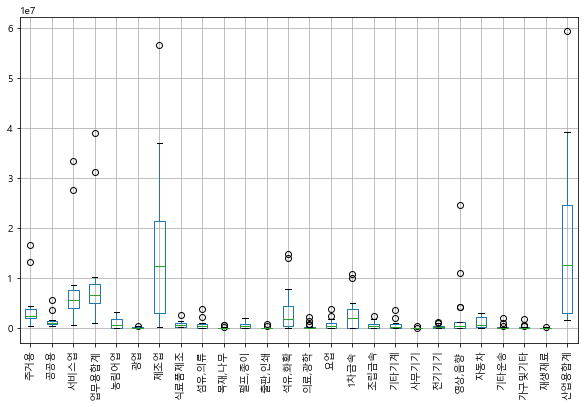

In [14]:
power2.boxplot(figsize=(10,6))
plt.xticks(rotation=90)

<AxesSubplot:>

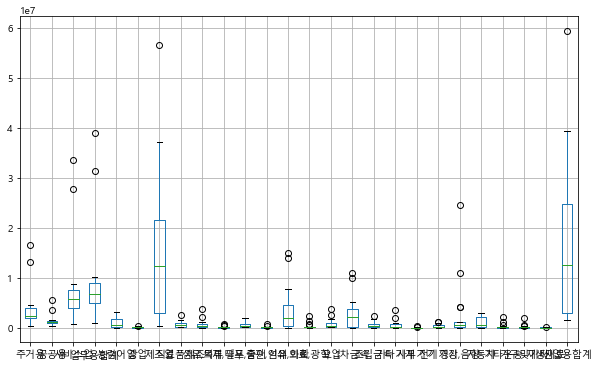

In [15]:
power.drop('합계', axis=1, errors='ignore').boxplot(figsize=(10,6))

<AxesSubplot:>

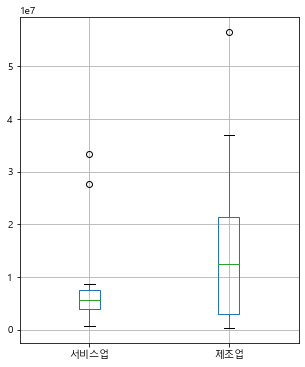

In [16]:
power[  ['서비스업','제조업']  ].boxplot(figsize=(5,6))

<AxesSubplot:ylabel='구분'>

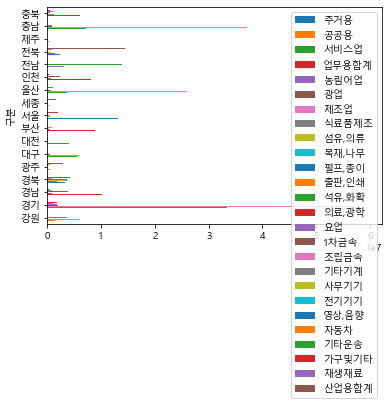

In [17]:
power2.plot(kind='barh', figsize=(6,4), stacked=False)

<AxesSubplot:ylabel='구분'>

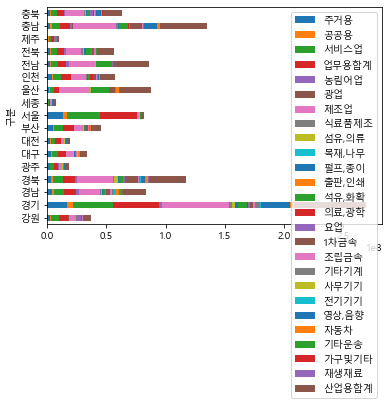

In [18]:
power2.plot(kind='barh', figsize=(6,4), stacked=True)

<AxesSubplot:xlabel='구분'>

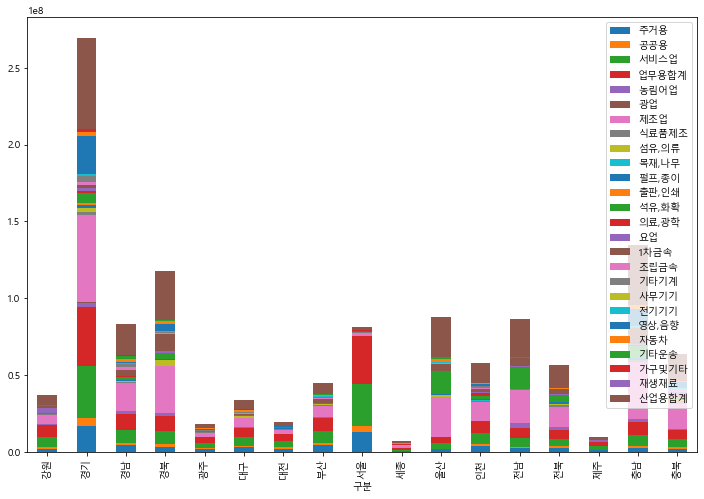

In [19]:
power2.plot(kind='bar', figsize=(12,8), stacked=True)

<AxesSubplot:xlabel='구분'>

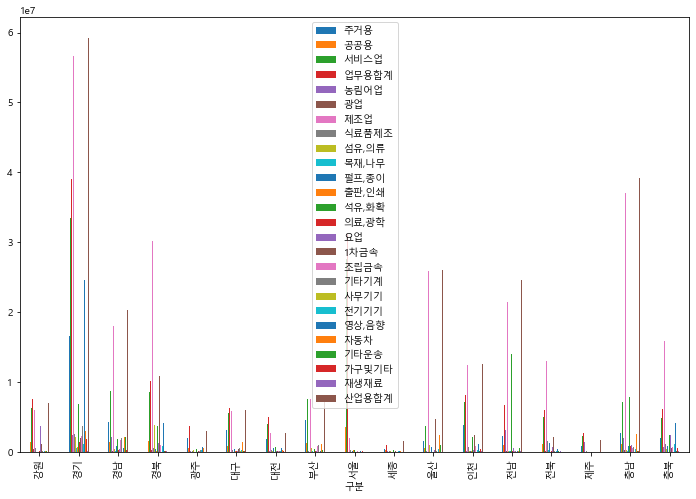

In [20]:
power2.plot(kind='bar', figsize=(12,8), stacked=False)

<AxesSubplot:ylabel='구분'>

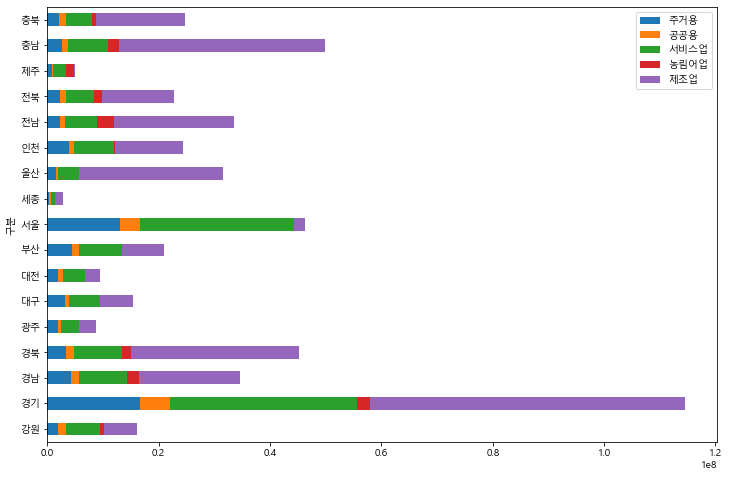

In [21]:
sample = ['주거용', '공공용', '서비스업', '농림어업', '제조업']
power[sample].plot(kind='barh', figsize=(12,8), stacked=True)

In [22]:
power3 = power[['서비스업', '제조업']]

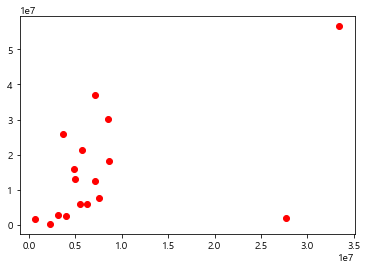

In [23]:
plt.scatter(power3['서비스업'], power3['제조업'],c='r',marker='o')

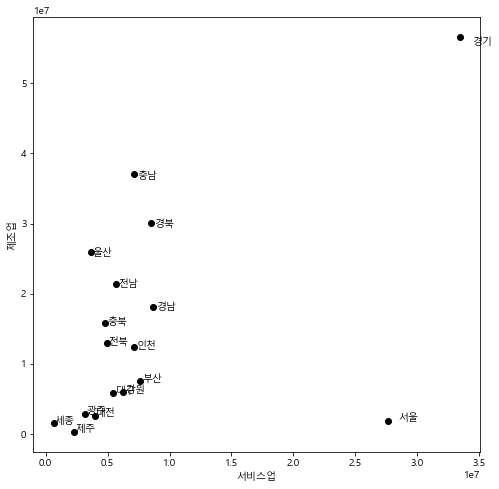

In [24]:
plt.figure(figsize=(8,8))
## 차트 작성( 차트크기=())
plt.scatter(power3['서비스업'], power3['제조업'],  c='k', marker='o')

plt.xlabel('서비스업')
plt.ylabel('제조업')

for n in range(power.shape[0]):
    plt.text(power3['서비스업'][n]*1.03, power3['제조업'][n]*0.98,power3.index[n])

In [ ]:
power3 = power3.drop(['경기', '서울'])

In [27]:
power3.head(2)

,서비스업,제조업
구분,,
강원,6203749,6002286
경남,8667737,18053778


Text(0, 0.5, '제조업')

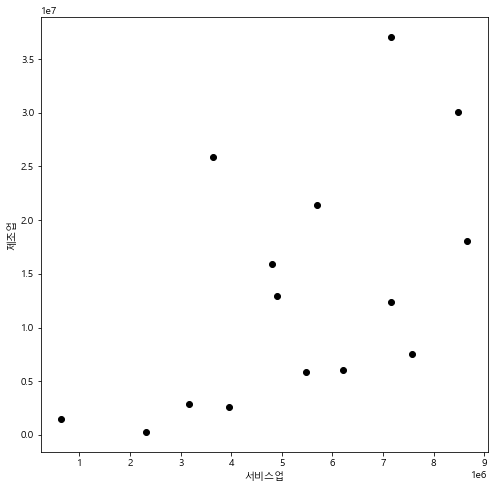

In [29]:
plt.figure(figsize=(8,8))
## 차트 작성( 차트크기=())
plt.scatter(power3['서비스업'], power3['제조업'],  c='k', marker='o')

plt.xlabel('서비스업')
plt.ylabel('제조업')
